In [105]:
import time
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [174]:
load_error = pd.read_csv("../src/data/load_errors_date.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
pv_error = pd.read_csv("../src/data/pv_errors_date.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
load_error.head(2)

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,date,rmse
0,-0.783854,-3.156250,1.316406,1.187500,-1.440104,4.765625,7.118490,9.083333,5.062500,8.226562,...,-17.71875,-19.437500,-17.703125,-22.187500,-24.265625,-2.984375,-6.515625,-5.031250,2021-04-14 00:00:00,12.698719
1,-2.625000,1.846354,1.546875,-1.177083,5.080729,7.320312,9.057292,5.020833,7.582031,1.513021,...,-19.43750,-17.703125,-22.187500,-24.265625,-2.984375,-6.515625,-5.031250,-8.359375,2021-04-14 00:10:00,12.736019


In [175]:
N= 60
def remove_outliers(df, N, pl= 5, pu=95):
    steps = [str(i) for i in range(N)]
    print("Shape before", df.shape)
    upper = np.percentile(df[str(N-1)], pu)
    lower = np.percentile(df[str(N-1)], pl)
    for step in steps:
        df = df[(df[step] < upper) & (df[step] > lower)]
    print("Shape after", df.shape)
    return df


load_error = remove_outliers(load_error, N)
pv_error = remove_outliers(pv_error, N)

Shape before (1311, 62)
Shape after (306, 62)
Shape before (2319, 62)
Shape after (1204, 62)


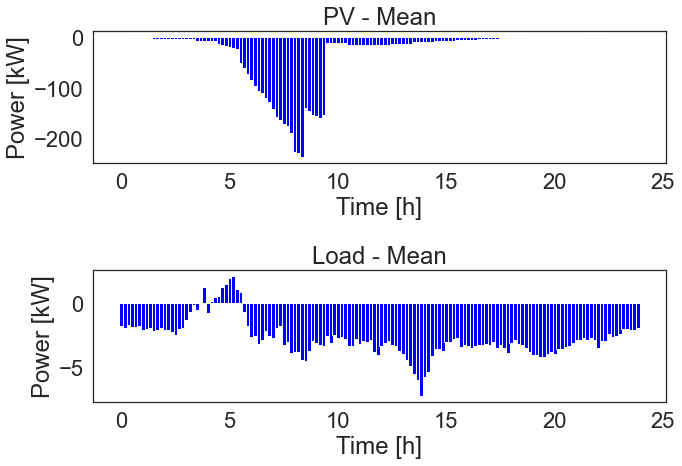

In [154]:

sn.set(style="white", font_scale= 2)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7))
steps = [str(i) for i in range(N)]


def plot_rmse_with_time(df, ax, title):
    for (hour, minute), errors in df.groupby([df.date.dt.hour, df.date.dt.minute]):
        rmse = np.mean(np.mean(errors.filter(steps)))
        #rmse = np.mean(errors["0"])
        ax.bar(hour + minute/60, rmse,  width = 0.17, color = "blue", alpha= 1)
        ax.set_title("{} - Mean".format(title))
        ax.set_xlabel("Time [h]")
        ax.set_ylabel("Power [kW]")

plot_rmse_with_time(pv_error, ax1, "PV")
plot_rmse_with_time(load_error, ax2, "Load")

plt.tight_layout()
#plt.savefig("../figs/pv_load_mean.png", format="png")
plt.show()

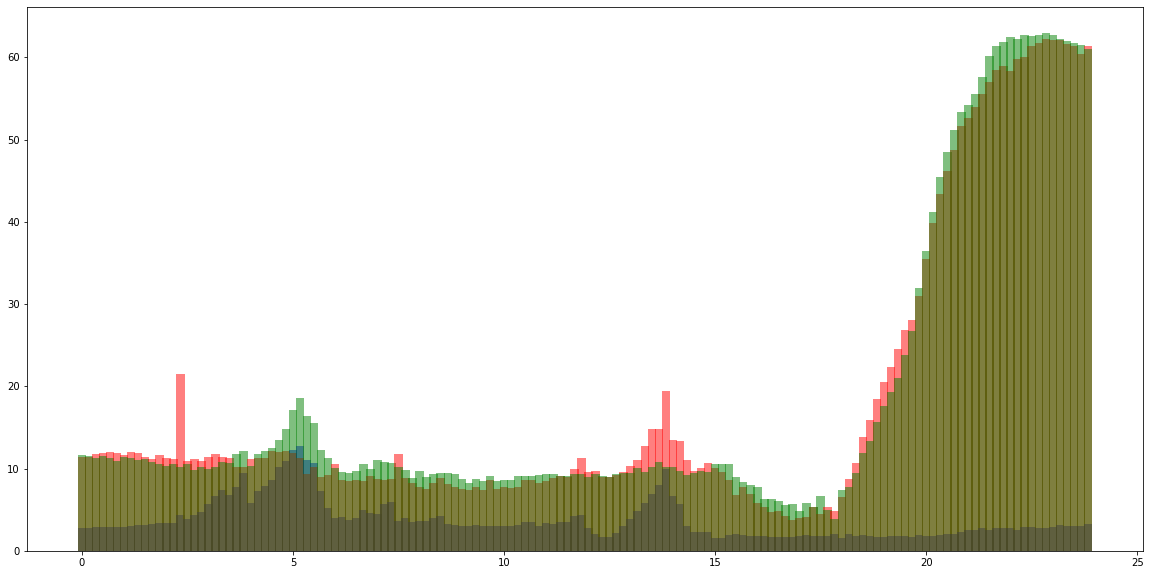

,i,type,prob,0,1,2,3,4,5,6,...,50,51,52,53,54,55,56,57,58,59
0,0.0,0.0,0.166677,-6.236979,-6.812500,-6.886719,-9.750000,-12.933594,-8.976562,-11.209635,...,-41.421875,-35.640625,-22.968750,-25.625000,-31.953125,-35.875000,-27.828125,-35.984375,-43.828125,-36.718750
1,0.0,1.0,0.670156,0.820668,-1.576477,-0.803991,-0.645000,-1.445099,-0.170795,-2.253864,...,-4.073182,-7.033125,-1.998409,-0.995966,2.179261,-0.752557,-3.873920,-1.113409,-8.706648,-8.129148
2,0.0,2.0,0.163167,4.794271,3.000000,2.774148,7.750000,6.669271,6.171875,7.118490,...,29.109375,18.921875,19.331250,25.687500,41.062500,28.250000,20.267045,33.203125,14.539773,19.039773
3,1.0,0.0,0.165965,-11.328125,-10.872396,-8.062500,-14.614583,-8.622396,-13.398438,-12.710938,...,-35.640625,-22.968750,-25.625000,-31.953125,-35.875000,-27.828125,-35.984375,-43.828125,-36.718750,-40.796875
4,1.0,1.0,0.670166,-2.447614,-1.548494,-1.299375,-2.029830,-0.526705,-2.547955,-3.572159,...,-7.033125,-1.998409,-0.995966,2.179261,-0.752557,-3.873920,-1.113409,-8.706648,-8.129148,-4.258125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,142.0,1.0,0.910218,-2.694444,-0.536616,0.548059,-1.599116,-1.319602,-1.135417,-1.816682,...,-1.834280,7.366477,0.632576,-4.708333,-0.076705,1.232955,4.296402,1.570076,-1.498106,-0.868371
428,142.0,2.0,0.044496,4.393229,8.843750,6.362216,8.187500,5.256510,6.656250,6.267045,...,93.609375,112.640625,119.109375,115.828125,120.234375,107.437500,95.062500,106.593750,106.921875,113.531250
429,143.0,0.0,0.048023,-6.500000,-4.067708,-7.125000,-4.807292,-7.718750,-8.984375,-5.830729,...,-143.187500,-152.046875,-152.828125,-141.281250,-106.437500,-86.703125,-121.375000,-128.140625,-120.734375,-149.953125
430,143.0,1.0,0.903667,2.000789,2.834122,0.352746,0.466540,0.458333,-0.424716,-0.083728,...,7.366477,0.632576,-4.708333,-0.076705,1.232955,4.296402,1.570076,-1.498106,-0.868371,-9.259470


In [93]:

def create_scenario_df(N, all_errors):
    c = ["i", "type", "prob"]
    steps = [str(i) for i in range(N)]
    df = pd.DataFrame(columns = c + steps)
    i = 0
    step = 0
    plt.figure(figsize = (20,10))
    for (hour, minute), errors in all_errors.groupby([all_errors.date.dt.hour, all_errors.date.dt.minute]):
        step_errors = errors.filter(steps)
        _mean = np.mean(step_errors, axis = 0)
        _min = np.min(step_errors, axis = 0)
        _max = np.max(step_errors, axis = 0)
        stds = np.array([1/np.std(_min), 1/np.std(_max), 1/np.std(_mean)]).sum()
        df.loc[i] = _min
        df.loc[i]["i"] = step
        df.loc[i]["type"] = 0
        df.loc[i]["prob"] = (1/np.std(_min))/stds
        i += 1
        df.loc[i] = _mean
        df.loc[i]["i"] = step
        df.loc[i]["type"] = 1
        df.loc[i]["prob"] = (1/np.std(_mean))/stds
        i += 1
        df.loc[i] = _max
        df.loc[i]["i"] = step
        df.loc[i]["type"] = 2
        df.loc[i]["prob"] = (1/np.std(_max)
        i += 1
        step += 1

        """
        plt.figure(figsize = (20,3))c
        plt.plot(np.mean(step_errors, axis = 0), color = "green")
        plt.plot(l_min,color = "blue")
        plt.plot(l_max, color = "red")
        plt.show()
        time.sleep(0.6)
        """


        plt.bar(hour + minute/60, np.std(_mean), width = 0.20, color = "blue", alpha= 0.5)
        plt.bar(hour + minute/60, np.std(_min), width = 0.20, color = "red", alpha=0.5)
        plt.bar(hour + minute/60, np.std(_max), width = 0.20, color = "green", alpha= 0.5)
    return df.reset_index(drop=True)



load_df = create_scenario_df(N, load_error)
plt.show() 
load_df

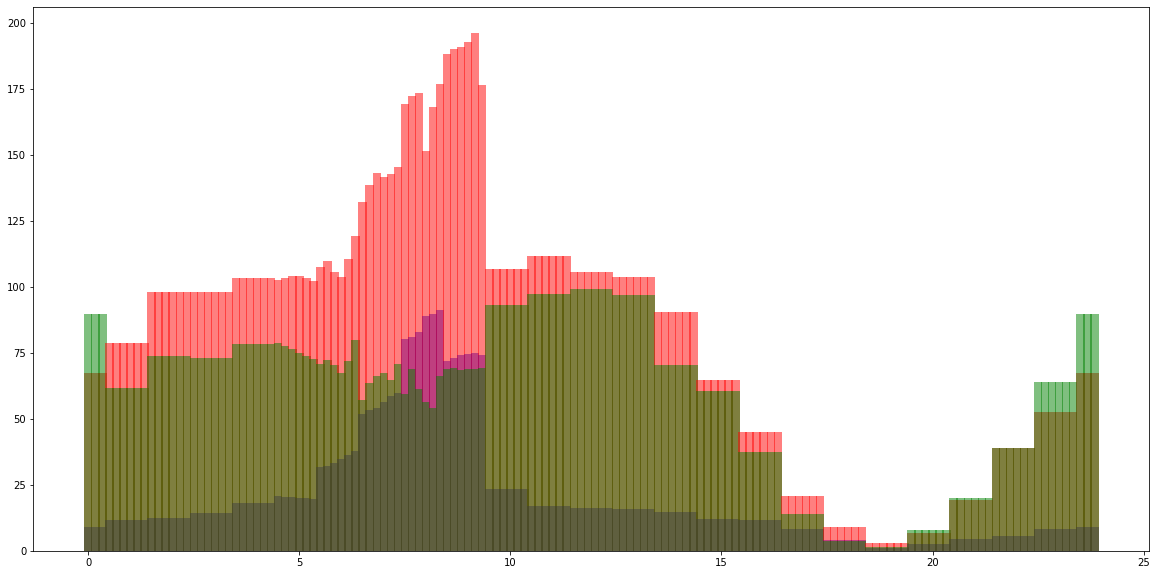

,i,type,prob,0,1,2,3,4,5,6,...,50,51,52,53,54,55,56,57,58,59
0,0.0,0.0,0.107396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-135.434639,-121.941599,-158.633231,-137.272326,-126.781722,-147.060716,-151.035654,-136.807840,-179.757202,-287.420918
1,0.0,1.0,0.811946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.511644,39.862534,9.198772,15.434177,19.612864,-2.127431,7.280499,4.440813,-7.435522,-12.757792
2,0.0,2.0,0.080658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,181.661525,225.130204,211.159590,221.285522,221.657241,252.086958,252.820831,263.307128,266.893298,283.395908
3,1.0,0.0,0.107396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-135.434639,-121.941599,-158.633231,-137.272326,-126.781722,-147.060716,-151.035654,-136.807840,-179.757202,-287.420918
4,1.0,1.0,0.811946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.511644,39.862534,9.198772,15.434177,19.612864,-2.127431,7.280499,4.440813,-7.435522,-12.757792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,142.0,1.0,0.810122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.891965,36.335327,4.209980,12.172470,16.777440,-4.587081,5.689395,1.968996,-12.431297,-21.131683
428,142.0,2.0,0.081455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,181.661525,225.130204,211.159590,221.285522,221.657241,252.086958,252.820831,263.307128,266.893298,283.395908
429,143.0,0.0,0.108423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-135.434639,-121.941599,-158.633231,-137.272326,-126.781722,-147.060716,-151.035654,-136.807840,-179.757202,-287.420918
430,143.0,1.0,0.810122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.891965,36.335327,4.209980,12.172470,16.777440,-4.587081,5.689395,1.968996,-12.431297,-21.131683


In [94]:
pv_df = create_scenario_df(N, pv_error)
plt.show()
pv_df

In [95]:
load_df.to_csv("../src/data/load_scenarios.csv")
pv_df.to_csv("../src/data/pv_scenarios.csv")

In [42]:
df = pd.read_csv("../src/data/10.5_cleaned.csv", parse_dates = ["date"]).fillna(0).set_index("date")
df

,airTemp,GHI,PAI,L,PV
date,,,,,
2021-03-17 00:00:00,0.000000,0.0,0.0,123.75000,0.0
2021-03-17 00:10:00,2.000000,0.0,0.0,129.37500,0.0
2021-03-17 00:20:00,0.000000,0.0,0.0,131.34375,0.0
2021-03-17 00:30:00,2.050000,0.0,0.0,124.50000,0.0
2021-03-17 00:40:00,2.066667,0.0,0.0,122.43750,0.0
...,...,...,...,...,...
2021-05-09 23:10:00,5.600000,0.0,0.0,104.25000,0.0
2021-05-09 23:20:00,0.000000,0.0,0.0,104.81250,0.0
2021-05-09 23:30:00,0.000000,0.0,0.0,118.87500,0.0


In [43]:
grouped = df.groupby(df.index.floor('d'), as_index = False)


load_weekday = []
load_weekend = []

def is_weekday(day):
    if day.weekday() < 5:
        return True
    return False

for day, group in grouped:
    if is_weekday(day):
        load_weekday.append(group.L.values)
    else:
        load_weekend.append(group.L.values)



load_weekday = np.asarray(load_weekday)
load_weekend = np.asarray(load_weekend)
load_weekday.shape, load_weekend.shape

((38, 144), (16, 144))

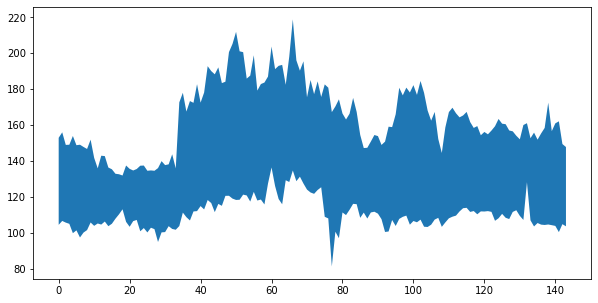

In [59]:
def get_percentiles(array, pu = 90, pl=10):

    upper = np.percentile(array, 96, axis = 0)
    lower = np.percentile(array, 4, axis = 0)
    
    return lower, upper

weekend_upper, weekend_lower = get_percentiles(load_weekend)

plt.figure(figsize = (10,5))
plt.fill_between(range(144), weekend_upper, weekend_lower)

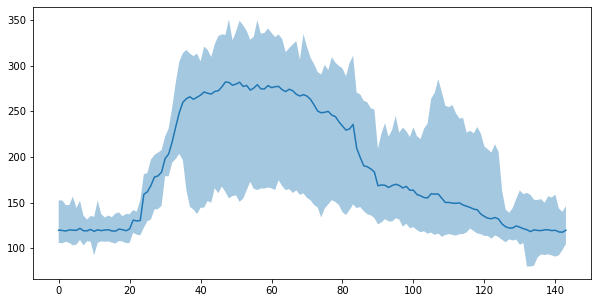

In [60]:
weekday_upper, weekday_lower = get_percentiles(load_weekday)

plt.figure(figsize = (10,5))
plt.plot(np.mean(load_weekday, axis = 0))
plt.fill_between(range(144), weekday_upper, weekday_lower, alpha = 0.4)

In [176]:
all_load_errors = pv_error.filter(steps).values.flatten()
all_pv_errors = pv_error.filter(steps).values.flatten()[:all_load_errors.shape[0]]
all_load_errors.shape, all_pv_errors.shape

((72240,), (72240,))

In [177]:
data = pd.DataFrame( data = {"PV":all_pv_errors, "Load": all_load_errors}, columns = ["PV", "Load"])

/Users/theo/anaconda3/envs/project/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


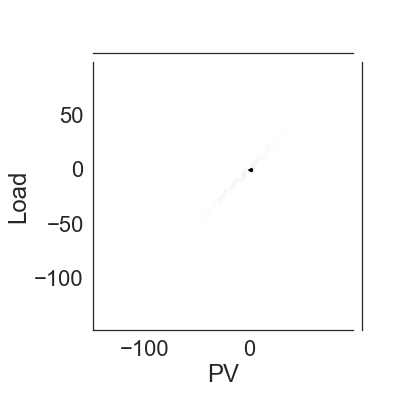

In [178]:
with sn.axes_style("white"):
    sn.jointplot("PV","Load", data, kind="hex")